In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/yldrm/Desktop/gayesu/Data/diabetes.csv")

In [3]:
df.head(9)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1


<Axes: xlabel='Glucose', ylabel='BloodPressure'>

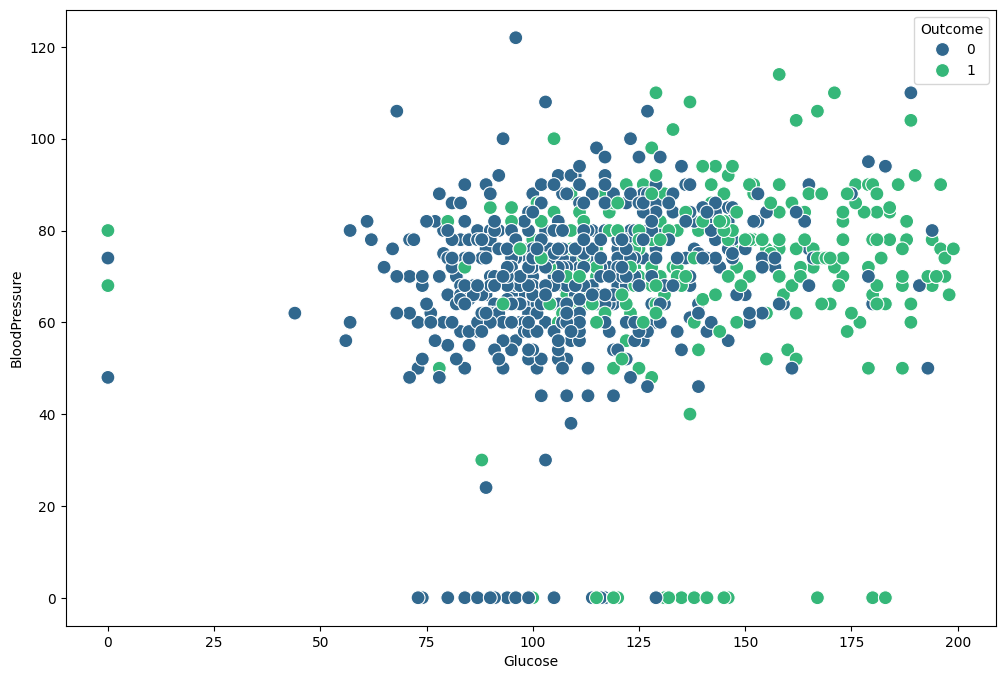

In [4]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Glucose', y='BloodPressure', hue='Outcome', data=df, palette='viridis', s=100)

In [5]:
X=df[["Glucose",'BloodPressure',"Insulin"]].values

In [6]:
X[0:5]

array([[148,  72,   0],
       [ 85,  66,   0],
       [183,  64,   0],
       [ 89,  66,  94],
       [137,  40, 168]], dtype=int64)

In [8]:
y = df['Outcome'].values

In [9]:
y[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [10]:
from sklearn import preprocessing

# Normalize Data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [11]:
X[0:5]

array([[ 0.84832379,  0.14964075, -0.69289057],
       [-1.12339636, -0.16054575, -0.69289057],
       [ 1.94372388, -0.26394125, -0.69289057],
       [-0.99820778, -0.16054575,  0.12330164],
       [ 0.5040552 , -1.50468724,  0.76583594]])

In [12]:
from sklearn.model_selection import train_test_split

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

k = 4

neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

In [14]:
y_hat = neigh.predict(X_test)
y_hat[0:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [15]:
from sklearn import metrics

print("Train set accuracy:", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set accuracy:", metrics.accuracy_score(y_test, y_hat))

Train set accuracy: 0.7915309446254072
Test set accuracy: 0.7207792207792207


In [16]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.7833876221498371
Test set Accuracy:  0.7987012987012987


In [17]:
from sklearn import metrics
Ks = 10

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_hat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)
    std_acc[n-1] = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

In [18]:
mean_acc

array([0.68181818, 0.68831169, 0.68181818, 0.72077922, 0.72077922,
       0.7987013 , 0.76623377, 0.76623377, 0.74675325])

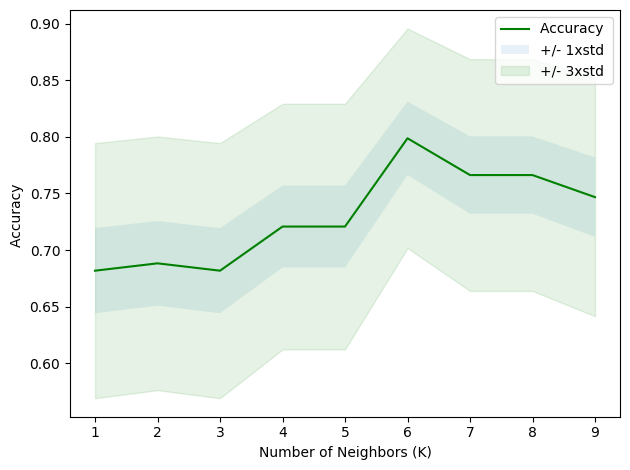

In [19]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()